In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model
#from keras_preprocessing import image
from shutil import copyfile
from tensorflow.keras.applications.xception import preprocess_input

import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
TRAINING_DIR = "DATASET 10 JENIS\TRAIN"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "DATASET 10 JENIS\TEST"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=10
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=10
)

Found 700 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [4]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

base_model.trainable = False

In [5]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 2,588,490
Trainable params: 330,506
Non-trainable params: 2,257,984
________________________________________

In [6]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [7]:
history = model.fit(train_generator,
                    epochs=25,
                    steps_per_epoch=700//10,
                    validation_data=validation_generator,
                    verbose = 1,
                    validation_steps=100//10)

Epoch 1/25
70/70 [==============================] - 32s 407ms/step - loss: 2.1380 - accuracy: 0.2786 - val_loss: 1.7123 - val_accuracy: 0.4200
Epoch 2/25
70/70 [==============================] - 21s 294ms/step - loss: 1.4153 - accuracy: 0.5643 - val_loss: 1.2006 - val_accuracy: 0.6900
Epoch 3/25
70/70 [==============================] - 23s 324ms/step - loss: 1.0648 - accuracy: 0.6800 - val_loss: 0.9814 - val_accuracy: 0.7100
Epoch 4/25
70/70 [==============================] - 25s 357ms/step - loss: 0.8846 - accuracy: 0.7300 - val_loss: 0.8352 - val_accuracy: 0.7800
Epoch 5/25
70/70 [==============================] - 23s 323ms/step - loss: 0.7731 - accuracy: 0.7614 - val_loss: 0.7362 - val_accuracy: 0.8000
Epoch 6/25
70/70 [==============================] - 26s 367ms/step - loss: 0.6855 - accuracy: 0.8014 - val_loss: 0.6753 - val_accuracy: 0.8000
Epoch 7/25
70/70 [==============================] - 31s 437ms/step - loss: 0.6370 - accuracy: 0.8100 - val_loss: 0.6012 - val_accuracy: 0.8400

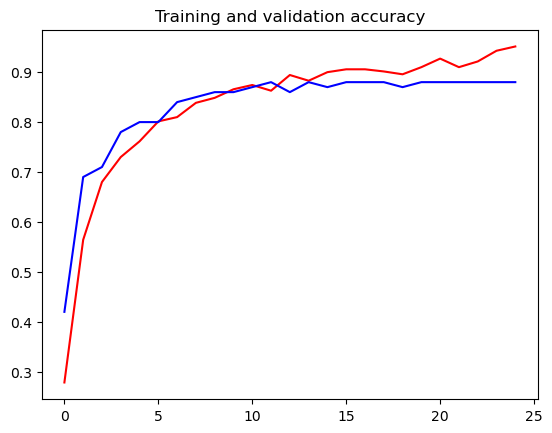

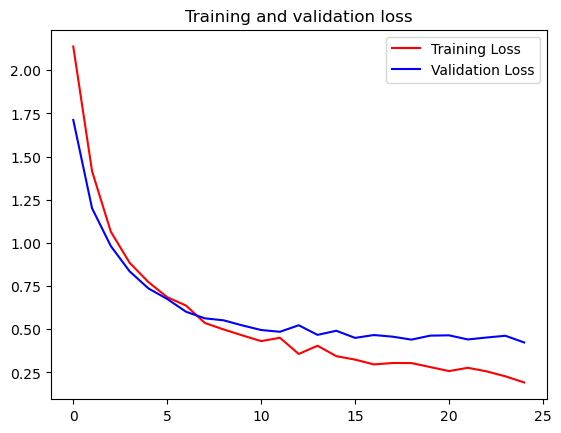

In [8]:
import matplotlib.pyplot as plt
#loss (categorical crossentropy) 
# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

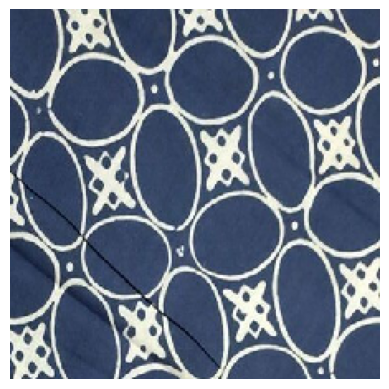

1/1 [==============================] - 0s 61ms/step
True label: Batik Kawung
Predicted label: Batik Kawung


In [25]:
def get_class_string_from_index(index):
   for class_string, class_index in validation_generator.class_indices.items():
      if class_index == index:
         return class_string

x, y = next(validation_generator)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show() 

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

In [23]:
model.save('checkpoint/MobileNetV2.h5')

In [9]:
model.save('checkpointadam/modelbatikadamMobileNetV2.h5')

In [3]:
from PIL import Image

model = tf.keras.models.load_model('checkpointadam\modelbatikadamMobileNetV2.h5')

image_path = 'DATASET 10 JENIS\TEST\Batik Tambal\TstBTambal (1).jpg'
image = Image.open(image_path)
image = image.resize((224, 224))  
image = np.array(image) / 255.0 
image = np.expand_dims(image, axis=0)

predictions = model.predict(image)
predicted_class = np.argmax(predictions[0])

class_labels = ['Batik Cirebon', 'Batik Ikat Celup', 'Batik Kalimantan Tengah', 'Batik Kawung', 
'Batik Papua', 'Batik Parang', 'Batik Poleng', 'Batik Sekar Jagad', 'Batik Tambal', 'Batik Truntum']  # Replace with your own class labels

print("Predicted class:", class_labels[predicted_class])

1/1 [==============================] - 1s 759ms/step
Predicted class: Batik Tambal
